# [부스트코스] 텐서플로우로 시작하는 딥러닝 기초

# Lab 02 Simple Linear Regression

In [137]:
import os
from time import time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [19]:
# Data
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

#W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

#learning_rate initialize
#기울기를 얼마만큼 반영할 것인가를 결정하는 값
learning_rate = 0.01

In [20]:
#Parameter(W, b) Update
print("    i\t     W\t\tb\tcost")
for i in range(100+1):
    # Gradient descent 
    with tf.GradientTape() as tape:
        hypothesis = W*x_data +b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate*W_grad)
    b.assign_sub(learning_rate*b_grad)
    if i&10 == 0:
        print("{:5}|{:10.4f}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    i	     W		b	cost
    0|    2.4520|     0.376| 45.660004
    1|    2.1100|    0.2814| 26.608438
    4|    1.4975|     0.112|  5.265920
    5|    1.3813|   0.07987|  3.068760
   16|    1.0256|  -0.01771|  0.008174
   17|    1.0210|  -0.01889|  0.004804
   20|    1.0128|  -0.02091|  0.001026
   21|    1.0113|  -0.02127|  0.000637
   32|    1.0063|  -0.02175|  0.000089
   33|    1.0062|  -0.02169|  0.000087
   36|    1.0060|   -0.0215|  0.000085
   37|    1.0060|  -0.02143|  0.000084
   48|    1.0057|  -0.02067|  0.000078
   49|    1.0057|   -0.0206|  0.000078
   52|    1.0056|  -0.02039|  0.000076
   53|    1.0056|  -0.02032|  0.000076
   64|    1.0054|  -0.01958|  0.000070
   65|    1.0054|  -0.01951|  0.000070
   68|    1.0053|  -0.01931|  0.000068
   69|    1.0053|  -0.01925|  0.000068
   80|    1.0051|  -0.01854|  0.000063
   81|    1.0051|  -0.01848|  0.000063
   84|    1.0051|  -0.01829|  0.000061
   85|    1.0051|  -0.01823|  0.000061
   96|    1.0049|  -0.01757|  0.000057
   9

# Lab 03 Linear Regression and How to minimize cost
## Cost function in pure Python - 비용 함수 구현하기

### 비용 = 편차 제곱의 평균
### 예측값 (=가정): $H(x) = Wx$ where W = gradient
### 비용함수: $cost(W) = \frac{1}{m} \sum_{i=1}^m (W x_i - y_i)^2$ where m = len(W) = 데이터의 개수
### 가정을 함수에 대입하면, $cost(W) = \frac{1}{m} \sum_{i=1}^m (H(x) - y_i)^2$

In [2]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

In [4]:
# cost function
def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c/len(X)

In [7]:
for feed_W in np.linspace(-3, 5, num=15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


### tensorflow를 이용한 비용함수의 구현

In [41]:
def cost_func_tf(W, X, Y):
    hypothesis = X * W
    return tf.reduce_mean(tr.square(hypothesis - Y))

In [42]:
W_values = np.linspace(-3, 5, num=15)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   74.66667
-2.429 |   54.85714
-1.857 |   38.09524
-1.286 |   24.38095
-0.714 |   13.71429
-0.143 |    6.09524
 0.429 |    1.52381
 1.000 |    0.00000
 1.571 |    1.52381
 2.143 |    6.09524
 2.714 |   13.71429
 3.286 |   24.38095
 3.857 |   38.09524
 4.429 |   54.85714
 5.000 |   74.66667


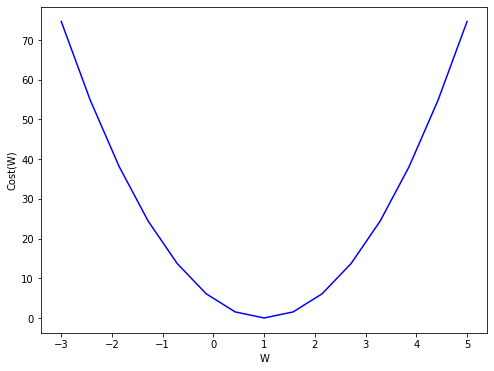

In [43]:
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

### tensorflow를 이용한 gradient 함수의 구현

### Gradient descent: $W = W - \alpha\frac{1}{m} \sum_{i=1}^m (W(x_i) - y_i)x_i$
### cost는 0으로 수렴, W는 특정 값으로 수렴

In [45]:
tf.random.set_seed(0) #for reproducibility

In [46]:
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# randomly choose
#W = tf.Variable(tf.random.normal([1], -100, 100))    #2 version
# set particular num
W = tf.Variable([5.0])

In [47]:
print('{:5} | {:10.4s} | {:10.6s}'.format('step', 'cost.numpy', 'W'))
for step in range(300):
    hypothesis = W*X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)
    
    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

step  | cost       | W         
    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


# Lab04 Multi-variable linear regression 

|x_1|x_2|x_3|y|
|:---:|:---:|:---:|:---:|
|73|80|75|152|
|93|88|93|185|
|89|91|90|180|
|96|98|100|196|
|73|66|70|142|

## $H(x_1, x_2, x_3) = w_1x_1 + w_2x_2 + w_3x_3$

In [60]:
# data and Label
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 93., 90., 100., 70.]
y = [152., 185., 180., 196., 142.]

# weights
w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

In [63]:
for i in range(1000+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        hypothesis = w1*x1 + w2*x2 + w3*x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - y))
    # calculates the gradients of the cost
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])
    
    #update w1, w2, w3 and b
    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 50 == 0:
        print("{:5} | {:12.4f}".format(i, cost.numpy()))

    0 |    3528.1030
   50 |      92.7332
  100 |      54.4777
  150 |      53.9173
  200 |      53.7753
  250 |      53.6384
  300 |      53.5022
  350 |      53.3662
  400 |      53.2305
  450 |      53.0953
  500 |      52.9603
  550 |      52.8258
  600 |      52.6917
  650 |      52.5578
  700 |      52.4243
  750 |      52.2911
  800 |      52.1583
  850 |      52.0259
  900 |      51.8939
  950 |      51.7621
 1000 |      51.6306


## Matrix

In [67]:
data = np.array([
    # x1, x2, x3, y
    [73., 80., 75., 152.],
    [93., 88., 93., 185.],
    [89., 91., 90., 180.],
    [96., 98., 100., 196.],
    [73., 66., 70., 142.]
], dtype=np.float32)

# slice data
# ,기준으로 앞 부분은 row, 뒷 부분은 column
# ,으로 구분된 항목에서는 : 처음 행부터 끝행까지 , :-1 첫 column부터 마지막 column은 제외
X = data[:, :-1]
Y = data[:, [-1]]

In [68]:
X

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.]], dtype=float32)

In [69]:
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.]], dtype=float32)

In [74]:
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
    return tf.matmul(X, W) + b # Matrix Multiplication

In [75]:
predict(X)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-257.55673],
       [-286.47382],
       [-294.48648],
       [-317.55252],
       [-215.21764]], dtype=float32)>

In [79]:
n_epochs = 2000
print("{:5} | {:10.4s}".format('epoch', 'cost'))
for i in range(n_epochs+1):
    # record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(predict(X) - Y))
    
    # calculates the gradients of the Loss
    W_grad, b_grad = tape.gradient(cost, [W, b])
    
    #update W and b
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost      
    0 |    40.4728
  100 |    40.2619
  200 |    40.0522
  300 |    39.8436
  400 |    39.6359
  500 |    39.4296
  600 |    39.2244
  700 |    39.0203
  800 |    38.8172
  900 |    38.6152
 1000 |    38.4143
 1100 |    38.2145
 1200 |    38.0158
 1300 |    37.8183
 1400 |    37.6215
 1500 |    37.4260
 1600 |    37.2316
 1700 |    37.0380
 1800 |    36.8457
 1900 |    36.6543
 2000 |    36.4641


# Lab 5 Logistic Regression/Classification

In [9]:
# 데이터
x_train = [[1., 2.], [2., 3.], [3., 1.], [4., 3.], [5., 3.], [6., 2.]]
y_train = [[0.], [0.], [0.], [1.], [1.], [1.]]

x_test = [[5., 2.]]
y_test = [[1.]]

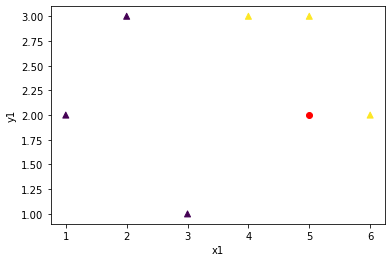

In [10]:
x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0]%3) for y in y_train]
plt.scatter(x1, x2, c=colors, marker='^')
plt.scatter(x_test[0][0], x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("y1")
plt.show()

## Tensorflow를 활용한 Logistic regression

## $sigmoid(x) = \frac{1}{1-e^(-x)}$
## $cost(h(x), y) = ylog(h(x)) - (1-y)log(1-h(x))$

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

W = tf.Variable(tf.zeros([2,1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')

In [53]:
# 함수정의
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(features, W) + b)) #sigmoid func
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels*tf.math.log(hypothesis) + (1-labels)*tf.math.log(1-hypothesis))
    return cost

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.int32))
    return accuracy

def grad(features, labels):
    with tf.GradientTape() as tape:
        hypothesis = logistic_regression(features)
        loss_value = loss_fn(hypothesis, labels)
    return tape.gradient(loss_value, [W, b])

In [26]:
optimizer = optimizers.SGD(learning_rate=0.01)

EPOCHS = 1001
for step in range(EPOCHS):
    for features, labels in iter(dataset.batch(len(x_train))):
        hypothesis = logistic_regression(features)
        grads = grad(features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
        if step%100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis, labels)))

test_acc = accuracy_fn(logistic_regression(x_test), y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test)>0.5, dtype=tf.int32)))
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145
Test Result = [[1]]
Testset Accuracy: 1.0000


# Lab6 Softmax Classification

In [5]:
#data
tf.random.set_seed(777)
x_data = [[1,2,1,1],
          [2,1,3,2],
          [3,1,3,4],
          [4,1,5,5],
          [1,7,5,5],
          [1,2,5,6],
          [1,6,6,6],
          [1,7,7,7]]
y_data = [[0,0,1],
          [0,0,1],
          [0,0,1],
          [0,1,0],
          [0,1,0],
          [0,1,0],
          [1,0,0],
          [1,0,0]]

x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

nb_classes = 3       

In [6]:
W = tf.Variable(tf.random.normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables=[W,b]

In [7]:
# 함수 정의
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y*tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

def grad_fn(X,Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X,Y)
        grads = tape.gradient(loss, variables)
        
        return grads
    
def fit(X,Y,epochs=2000,verbose=100):
    optimizer = optimizers.SGD(learning_rate=0.1)
    
    for i in range(epochs):
        grads = grad_fn(X,Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0)|((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X,Y).numpy()))

In [8]:
# Softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)


In [9]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y=x*x
dy_dx = g.gradient(y, x)

In [10]:
fit(x_data, y_data)

Loss at epoch 1: 2.849417
Loss at epoch 100: 0.684151
Loss at epoch 200: 0.613813
Loss at epoch 300: 0.558204
Loss at epoch 400: 0.508306
Loss at epoch 500: 0.461059
Loss at epoch 600: 0.415072
Loss at epoch 700: 0.369636
Loss at epoch 800: 0.324533
Loss at epoch 900: 0.280720
Loss at epoch 1000: 0.246752
Loss at epoch 1100: 0.232798
Loss at epoch 1200: 0.221645
Loss at epoch 1300: 0.211476
Loss at epoch 1400: 0.202164
Loss at epoch 1500: 0.193606
Loss at epoch 1600: 0.185714
Loss at epoch 1700: 0.178415
Loss at epoch 1800: 0.171645
Loss at epoch 1900: 0.165351
Loss at epoch 2000: 0.159483


## Prediction Check

In [11]:
sample_data = [[2,1,3,2]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)
b = hypothesis(x_data)

print(a)
print(b)

tf.Tensor([[0.00112886 0.08154673 0.9173244 ]], shape=(1, 3), dtype=float32)
tf.Tensor(
[[2.1975952e-06 1.2331170e-03 9.9876475e-01]
 [1.1288594e-03 8.1546687e-02 9.1732442e-01]
 [2.2205539e-07 1.6418624e-01 8.3581358e-01]
 [6.3921816e-06 8.5045439e-01 1.4953922e-01]
 [2.6150808e-01 7.2644734e-01 1.2044534e-02]
 [1.3783246e-01 8.6214006e-01 2.7417480e-05]
 [7.4242145e-01 2.5754160e-01 3.6978410e-05]
 [9.2197549e-01 7.8023903e-02 6.0005692e-07]], shape=(8, 3), dtype=float32)


## Convert as Class

In [12]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 2.472669
Loss at epoch 500: 0.375229
Loss at epoch 1000: 0.229923
Loss at epoch 1500: 0.182147
Loss at epoch 2000: 0.150633


# Lab 09-1 Neural Nets for XOR

## 2 Layer Neural Net

In [87]:
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2], -1)
    layer3 = tf.reshape(layer3, shape=[-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [88]:
tf.executing_eagerly()
tf.random.set_seed(777)

In [89]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [93]:
W1 = tf.Variable(tf.random.normal([2,1]), name='weight1')
b1 = tf.Variable(tf.random.normal([1]), name='bias1')

W2 = tf.Variable(tf.random.normal([2,1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

W3 = tf.Variable(tf.random.normal([2,1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

In [94]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01) #tf.train.GradientDescentOptimizer
EPOCHS = 50000

In [95]:
for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
            
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.7824
Iter: 5000, Loss: 0.6928
Iter: 10000, Loss: 0.6890
Iter: 15000, Loss: 0.6827
Iter: 20000, Loss: 0.6697
Iter: 25000, Loss: 0.6437
Iter: 30000, Loss: 0.5864
Iter: 35000, Loss: 0.4246
Iter: 40000, Loss: 0.2294
Iter: 45000, Loss: 0.1340
Testset Accuracy: 1.0000


# Lab10 Relu

## Checkpoint function

In [134]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

## Load mnist

In [108]:
def load_mnist(): 
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data() #6만장, 1만장
    
    #batch_size, height, width, channel
    #expand 함수로 channel 끝에 추가
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1)
    
    train_data, test_data = normalize(train_data, test_data) #[0~255] -> [0~1]
    
    #One-hot Encoding
    train_labels = to_categorical(train_labels, 10) #[N, ] -> [N. 10]
    test_labels = to_categorical(test_labels, 10) # [N, ] -> [N, 10]
    
    return train_data, train_labels, test_data, test_labels
    
def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0
    
    return train_data, test_data

## Create network

In [109]:
def flatten():
    return tf.keras.layers.Flatten()

def dense(channel, weight_init):
    return tf.keras.layers.Dense(units=channel, use_bias=True, kernel_initializer=weight_init)

def relu():
    return tf.keras.layers.Activation(tf.keras.activations.relu)

In [125]:
class create_model(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model, self).__init__()
        
        weight_init = tf.keras.initializers.RandomNormal()
        self.model = tf.keras.Sequential()
        
        self.model.add(flatten()) #[N, 28, 28, 1] -> [N, 784]
        
        for i in range(2):
            #[N, 784] -> [N, 256] -> [N, 256]
            self.model.add(dense(256, weight_init))
            self.model.add(relu())
        
        self.model.add(dense(label_dim, weight_init))
        
    def call(self, x, training=None, mask=None):
        x=self.model(x)
        return x

## Define loss

In [139]:
# 대상이 '7'이라면, label은 00000 00100이고, softmax 값은 7번자리가 가장 큰값 (총합 1)
def loss_fn(model, images, labels):
    logits = model(images, training=True)    
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    #logit, label shape: [batch size, label_dim]
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1)) #argmax: 숫자가 가장 큰 위치 리턴
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32)) #숫자로 변경
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

## Experiements

In [127]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

In [128]:
""" Graph Input using Dataset API"""
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size).\
    repeat()

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x)).\
    repeat()

In [135]:
""" Model """
network = create_model(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_softmax'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

## Train

In [140]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...


KeyboardInterrupt: 